librairies

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import json as js

data

In [5]:
with open("data.json", "r") as file:
    dic = js.load(file)

print(dic)

{'parameters': {'max bond dimension': 500, 'nsweep range': [100, 200, 50], 'fixed number of sweep': 50, 'cutoff': 1e-15, 'N': 50, 'disorder': 0, 'length range': [5, 50], 'J': 1, 'Trotter-Suzuki step': 0.001, 'D0': 10, 'site measure': 25}, 'results': {'energy sweep list': [-0.03547305775061899, -0.056192546230722486, -0.07734521840617513], 'sweep list': [100, 150, 200], 'length list': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'energy length list': [-0.030742136572799117, -0.162916333911339, 0.02774367002957712, -0.058186713155708544, 0.008775580297881683, -0.005422408575347423, -0.029819072018627577, -0.03176747237508871, -0.02212697856332908, -0.01175073606607879, -0.016311049566017432, -0.06144805250696164, -0.0029661926203702563, -0.030003507676514846, -0.042907780594803435, -0.018469512709514017, -0.02681748029568156, -0.01251397792932737, -0.041

Text(0.5, 1.0, 'nswepp, cutoff, delat_tau')

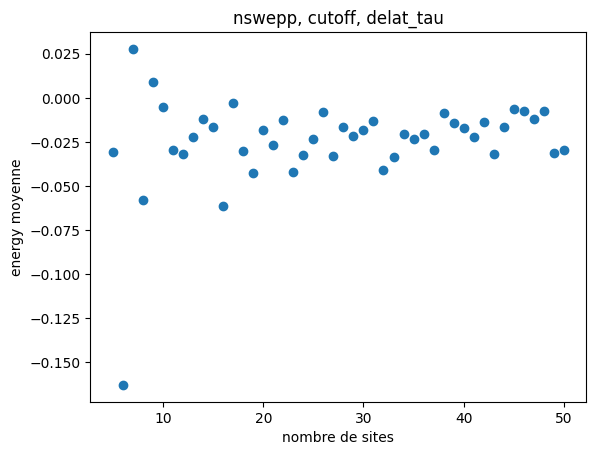

In [18]:
fig, axes = plt.subplots()
axes.scatter(dic["results"]["length list"], dic["results"]["energy length list"])
axes.set_xlabel("nombre de sites")
axes.set_ylabel("energy moyenne")
axes.set_title("nswepp, cutoff, delat_tau")


Text(0, 0.5, 'magnétisation moyenne')

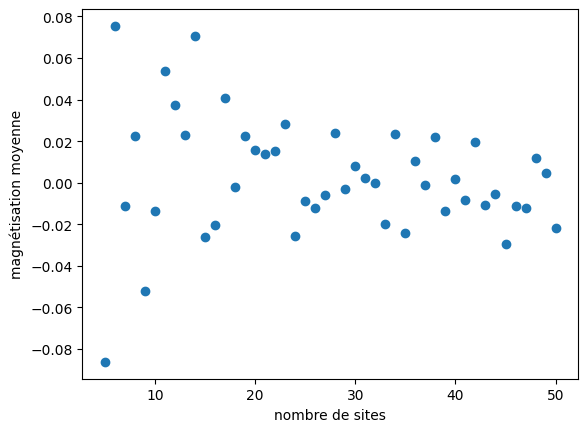

In [15]:
fig, axes = plt.subplots()
axes.scatter(dic["results"]["length list"], dic["results"]["magnetization length list"])
axes.set_xlabel("nombre de sites")
axes.set_ylabel("magnétisation moyenne")

Text(0, 0.5, 'energy moyenne')

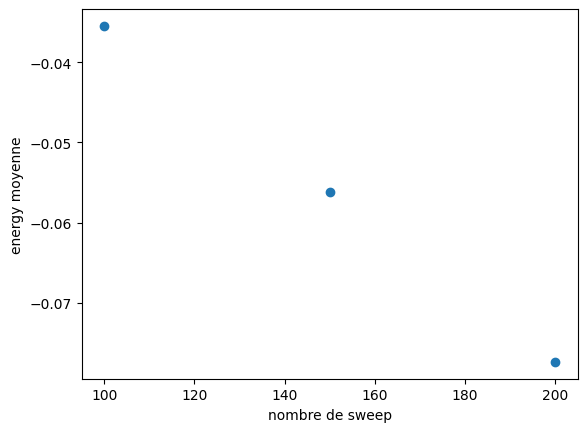

In [16]:
fig, axes = plt.subplots()
axes.scatter(dic["results"]["sweep list"], dic["results"]["energy sweep list"])
axes.set_xlabel("nombre de sweep")
axes.set_ylabel("energy moyenne")

Text(0, 0.5, 'magnétisation moyenne')

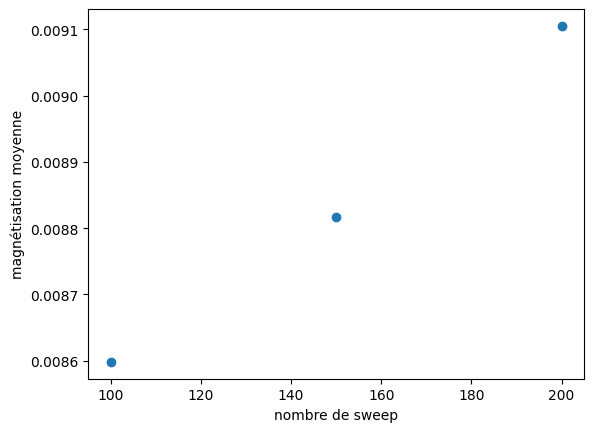

In [17]:
fig, axes = plt.subplots()
axes.scatter(dic["results"]["sweep list"], dic["results"]["magnetization sweep list"])
axes.set_xlabel("nombre de sweep")
axes.set_ylabel("magnétisation moyenne")